# Candy Land Simulation

In [259]:
import random

import matplotlib.pyplot as plt

# building board

board = ['start']

for x in range(21):
    for color in "rpybog":
        board.append(color)
board.append('r')

# inserting special characters
board.insert(9, "Plumpy")
board.insert(18, "MrMint")
board.insert(43, "MrGumdrop")
board.insert(75, "NanaNutbread")
board.insert(96, "PrincessLolly")
board.insert(104, "QueenFrostine")
board.append("end")

# special character dictionary

special = {"Plumpy": 9, "MrMint": 18, "MrGumdrop": 43, "NanaNutbread": 75, "PrincessLolly": 96, "QueenFrostine": 104}


# Player Class

class Player:
    def __init__(self):
        self.loc = 0
        self.lost_turn = False
        self.has_won = False
        self.bothlost = False
        self.draws = 0
    def move(self):
        gameover = False
        if len(deck) > 0:
            draw = deck.pop()
            self.draws += 1
            #print(f"card drawn: {draw}") #temp
            if draw not in special:
                num = len(draw) # making sure only using shortcut if it is final land
                for char in draw:
                    num -= 1
                    split = board[self.loc + 1:]
                    if char in split:
                        ip = split.index(char)
                        done = False
                        '''Checking if landed on lose turn spaces'''
                        if self.loc + ip + 1 == 48 and num == 0:
                            self.loc += ip + 1
                            self.lost_turn = True
                            done = True
                        if self.loc + ip + 1 == 86 and num == 0:
                            self.loc += ip + 1
                            self.lost_turn = True
                            done = True
                        if self.loc + ip + 1 == 121 and num == 0:
                            self.loc += ip + 1
                            self.lost_turn = True
                            done = True
                        '''Checking if landed on a shortcut'''
                        if done == False:
                            if self.loc + ip + 1 == 5 and num == 0:
                                self.loc = 59
                            elif self.loc + ip + 1 == 34 and num == 0:
                                self.loc = 47
                            else:
                                self.loc += ip + 1
                    else:
                        self.has_won = True
            elif draw in special:
                self.loc = special.get(draw)
            #print(f"moved to: {self.loc}")
        else:
            #print("Game over: out of cards")
            self.bothlost = True


# Game Loop

lclist = []
dlist = []

def playgame(length):
    for x in range(length):
        # building deck
        global deck
        deck = []
        for x in range(9):
            for color in "rpybog":
                deck.append(color)
        for x in range(2):
            for color in "rpybog":
                newcolor = color + color
                deck.append(newcolor)

        deck.extend(["Plumpy", "MrMint", "MrGumdrop", "NanaNutbread", "PrincessLolly", "QueenFrostine"])
        random.shuffle(deck)

        p1 = Player()
        p2 = Player()
        curleader = 1
        leadchanges = 0
        while p1.has_won == False and p2.has_won == False and p1.bothlost == False and p2.bothlost == False:
            if p2.bothlost == False and p2.has_won == False:
                #print("\nP1 turn:")
                p1.move()
                if p1.loc > p2.loc:
                    if curleader != 1:
                        leadchanges += 1
                        curleader = 1
                elif p1.loc < p2.loc:
                    if curleader != 2:
                        leadchanges += 1
                        curleader = 2
                if p1.lost_turn == True:
                    #print("p1 lost turn")
                    if p1.bothlost == False and p1.has_won == False:
                        #print("\nP2 extra turn: ")
                        p2.move()
                        if p1.loc > p2.loc:
                            if curleader != 1:
                                leadchanges += 1
                                curleader = 1
                        elif p1.loc < p2.loc:
                            if curleader != 2:
                                leadchanges += 1
                                curleader = 2
                p1.lost_turn = False
            else:
                break

            if p1.bothlost == False and p1.has_won == False:
                #print("\nP2 turn: ")
                p2.move()
                if p1.loc > p2.loc:
                    if curleader != 1:
                        leadchanges += 1
                        curleader = 1
                elif p1.loc < p2.loc:
                    if curleader != 2:
                        leadchanges += 1
                        curleader = 2
                if p2.lost_turn == True:
                    #print("p2 lost turn")
                    if p2.bothlost == False and p2.has_won == False:
                        #print("\nP1 extra turn: ")
                        p1.move()
                        if p1.loc > p2.loc:
                            if curleader != 1:
                                leadchanges += 1
                                curleader = 1
                        elif p1.loc < p2.loc:
                            if curleader != 2:
                                leadchanges += 1
                                curleader = 2
                p2.lost_turn = False
            else:
                break
        dlist.append(p1.draws + p2.draws)
        lclist.append(leadchanges)
        
playgame(100000)




# Results


### Total Number of Cards Drawn + Longest and Shortest Games

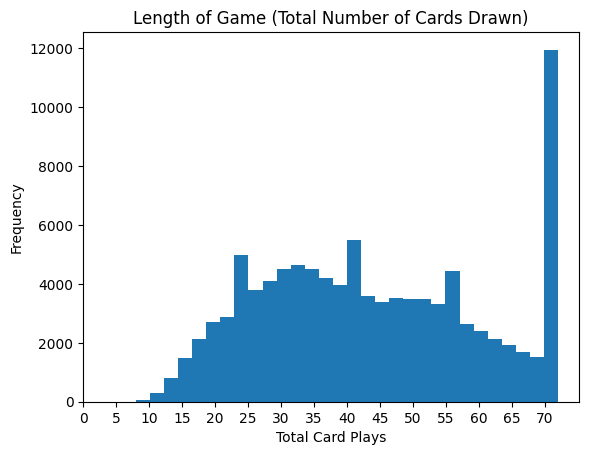

Average total number of cards drawn: 43.87864
Shortest game: 8
Longest game: 72


In [260]:
plt.hist(dlist, bins=30) # counts is list of game lengths that play(n) retruns, bins=="fine art"
plt.ylabel("Frequency")
plt.xlabel("Total Card Plays")
plt.xticks([x for x in range(0, max(dlist), 5)]) # tick labels == "fine art"
plt.title("Length of Game (Total Number of Cards Drawn)")
# change colors, etc.
plt.show()

daverage = sum(dlist) / len(dlist)
print(f"Average total number of cards drawn: {daverage}")
print(f"Shortest game: {min(dlist)}\nLongest game: {max(dlist)}")



### Total Number of Lead Changes

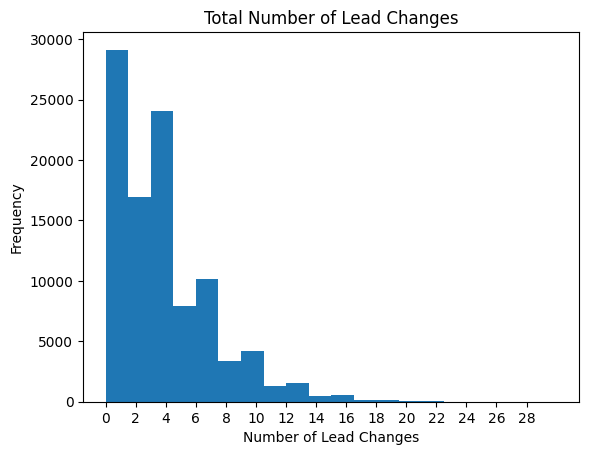

Average total number of lead changes: 3.61204


In [261]:
plt.hist(lclist, bins=20) # counts is list of game lengths that play(n) retruns, bins=="fine art"
plt.ylabel("Frequency")
plt.xlabel("Number of Lead Changes")
plt.xticks([x for x in range(0, max(lclist), 2)]) # tick labels == "fine art"
plt.title("Total Number of Lead Changes")
# change colors, etc.
plt.show()

lcaverage = sum(lclist) / len(lclist)
print(f"Average total number of lead changes: {lcaverage}")
